In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

### `project_costs.csv` (The Financial & Vendor Data)

This file models the financial and vendor aspects of operations, supporting the **Finance and Communications** responsibilities.

| Column Name | Description | Relevance to Analyst Role | Example |
| :--- | :--- | :--- | :--- |
| `Cost_ID` | Unique ID for the expense/vendor item. | Financial tracking. | `C105` |
| `Task_ID` | Links the expense to the task that incurred it. | Enables **cost breakdown structure** analysis. | `T0012` |
| `Cost_Category` | The type of expense incurred. | Used to analyze spending trends for **Budget support**. | `External Consultant` |
| `Cost_Amount_USD` | The dollar value of the expense. | Core financial metric. | $5,500$ |
| `Vendor_Tool` | The specific vendor or software associated with the cost. | Used to manage and track **Comms tools, subscriptions, and contracts**. | `Coda.io` |

In [2]:
project_costs = pd.read_csv('project_costs.csv')

project_costs.head()

,Cost_ID,Task_ID,Cost_Category,Cost_Amount_USD,Vendor_Tool
0,C001,T0133,Software Subscription,3718,T&E Vendor
1,C002,T0157,Software Subscription,125,Gemini API
2,C003,T0875,Web Content License,9850,Legal Firm
3,C004,T0382,External Consultant,3824,Gemini API
4,C005,T1046,Travel/Retreat Expense,3558,Coda.io


In [3]:
project_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Cost_ID          500 non-null    object
 1   Task_ID          500 non-null    object
 2   Cost_Category    500 non-null    object
 3   Cost_Amount_USD  500 non-null    int64 
 4   Vendor_Tool      500 non-null    object
dtypes: int64(1), object(4)
memory usage: 19.7+ KB


In [4]:
project_costs.duplicated().sum()

0

###  `project_tasks.csv` (The Project Schedule & Effort)

This is the main dataset, defining the work being done and its operational constraints.

| Column Name | Description | Relevance to Analyst Role | Example |
| :--- | :--- | :--- | :--- |
| `Task_ID` | Unique ID for the specific work item. | Task tracking and project governance. | `T0042` |
| `Project_Name` | The broader initiative the task belongs to. | Helps categorize and report on major goals (e.g., Annual Retreat Planning). | `EU AI Act Compliance` |
| `Assigned_Staff_ID` | Links the task to the person responsible. | **Core for Resource Utilization analysis.** | `STAFF_14` |
| `Staff_Workload_FTE_Days` | Estimated effort needed, scaled from **0.1** to **5.0**. | **Workload intensity metric** (**1.0** = 8 hours of effort). Used for resource capacity planning. | $3.55$ |
| `Task_Duration_Hours` | Time allocated in the schedule, capped at **80** hours. | Used for **Gantt Chart** visualization and schedule management. | $40$ |
| `Timezone_Constraint_Score` | Score (**1**, **3**, **5**) indicating the need for synchronous ET/CET collaboration. | **Quantifies remote operations risk.** High score needs proactive follow-up. | $5$ (High Constraint) |
| `Project_Risk_Score` | General risk level associated with the task (1=Low, 5=High). | Used for prioritizing the Analyst's immediate **follow-up actions**. | $4$ (High Risk) |
| `External_Dependency_Flag` | Flag (**1** if yes, **0** if no) indicating reliance on an outside party (e.g., regulator, vendor). | Models waiting for external sign-offs, supporting **Vendor Management**. | $1$ |
| `Planned_Start_Date` | The official date the task was scheduled to begin. | Used to calculate schedule variance against actual dates. | `2025-11-15` |
| `Actual_Duration_Hours` | The time actually spent on the task. | Used for **variance analysis** (Actual vs. Planned) to improve future estimations. | $38.4$ |
| `Task_Status` | The current state of the task. | Used for project dashboards and progress reporting. | `Blocked` |
| `Predecessor_Task_ID` | The Task ID that must be completed before this task can start. | Essential for complex **Gantt Chart dependency modeling**. | `T0030` or `None` |

In [5]:
project_tasks = pd.read_csv('project_tasks.csv')

project_tasks.head()

,Task_ID,Project_Name,Assigned_Staff_ID,Staff_Workload_FTE_Days,Task_Duration_Hours,Timezone_Constraint_Score,Project_Risk_Score,External_Dependency_Flag,Planned_Start_Date,Actual_Duration_Hours,Task_Status,Predecessor_Task_ID
0,T0001,AI Ethics Framework,STAFF_05,2.22,66,1,2,0,2025-11-18,28.0,In Progress,T0873
1,T0002,AI Ethics Framework,STAFF_16,3.89,79,3,1,0,2025-11-28,60.0,In Progress,None
2,T0003,AI Ethics Framework,STAFF_05,4.28,58,1,3,0,2026-03-19,61.0,In Progress,T0096
3,T0004,AI Ethics Framework,STAFF_03,2.75,27,1,4,0,2025-10-15,64.0,In Progress,T0957
4,T0005,Annual Retreat Planning,STAFF_12,3.82,66,3,1,0,2026-03-24,27.0,In Progress,T0913


In [6]:
project_tasks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Task_ID                    1300 non-null   object 
 1   Project_Name               1300 non-null   object 
 2   Assigned_Staff_ID          1300 non-null   object 
 3   Staff_Workload_FTE_Days    1300 non-null   float64
 4   Task_Duration_Hours        1300 non-null   int64  
 5   Timezone_Constraint_Score  1300 non-null   int64  
 6   Project_Risk_Score         1300 non-null   int64  
 7   External_Dependency_Flag   1300 non-null   int64  
 8   Planned_Start_Date         1300 non-null   object 
 9   Actual_Duration_Hours      1300 non-null   float64
 10  Task_Status                1300 non-null   object 
 11  Predecessor_Task_ID        1300 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 122.0+ KB


In [7]:
project_tasks.duplicated().sum()

0

###  `staff_roster.csv` (The People: Who Is Working?)

This file serves as the lookup table for the 19 TFS staff members.

| Column Name | Description | Relevance to Analyst Role | Example |
| :--- | :--- | :--- | :--- |
| `Staff_ID` | Unique identifier for staff member. | **Data Merging:** Used to join staff attributes with tasks. | `STAFF_05` |
| `Name` | Staff member's professional name. | Used for final **reporting and resource visualization**. | `Mia Chen` |
| `Department` | The core functional area (Ops, Comms, Policy). | Used to analyze resource balance and workload distribution across teams. | `Policy` |
| `Timezone` | Geographic time zone of the staff member. | **Crucial for cross-timezone risk analysis** and coordinating the international team. | `CET` |

In [8]:
staff_roster = pd.read_csv('staff_roster.csv')

staff_roster.head()

,Staff_ID,Name,Department,Timezone
0,STAFF_01,Mason Pace,Ops,ET
1,STAFF_02,Jase Fischer,Ops,CET
2,STAFF_03,Zhuri Russo,Ops,CET
3,STAFF_04,Melany Shaw,Ops,CET
4,STAFF_05,Abby Ellison,Policy,ET


In [9]:
staff_roster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Staff_ID    19 non-null     object
 1   Name        19 non-null     object
 2   Department  19 non-null     object
 3   Timezone    19 non-null     object
dtypes: object(4)
memory usage: 736.0+ bytes


In [10]:
staff_roster.duplicated().sum()

0

## Resource Utilization: Find the staff members who are currently overloaded with FTE days.

In [11]:
# renaming Assigned_Staff_ID to Staff_ID

project_tasks = project_tasks.rename(columns={'Assigned_Staff_ID': 'Staff_ID'})

project_tasks.head()

,Task_ID,Project_Name,Staff_ID,Staff_Workload_FTE_Days,Task_Duration_Hours,Timezone_Constraint_Score,Project_Risk_Score,External_Dependency_Flag,Planned_Start_Date,Actual_Duration_Hours,Task_Status,Predecessor_Task_ID
0,T0001,AI Ethics Framework,STAFF_05,2.22,66,1,2,0,2025-11-18,28.0,In Progress,T0873
1,T0002,AI Ethics Framework,STAFF_16,3.89,79,3,1,0,2025-11-28,60.0,In Progress,None
2,T0003,AI Ethics Framework,STAFF_05,4.28,58,1,3,0,2026-03-19,61.0,In Progress,T0096
3,T0004,AI Ethics Framework,STAFF_03,2.75,27,1,4,0,2025-10-15,64.0,In Progress,T0957
4,T0005,Annual Retreat Planning,STAFF_12,3.82,66,3,1,0,2026-03-24,27.0,In Progress,T0913


In [12]:
tasks_projects_df = project_tasks.merge(staff_roster, how='left', on='Staff_ID')

# removing completed tasks from dataframe
tasks_projects_df = tasks_projects_df[tasks_projects_df['Task_Status'] != 'Completed']

In [13]:
# making sure no completed tasks are included
tasks_projects_df[tasks_projects_df['Task_Status'] == 'Completed']

,Task_ID,Project_Name,Staff_ID,Staff_Workload_FTE_Days,Task_Duration_Hours,Timezone_Constraint_Score,Project_Risk_Score,External_Dependency_Flag,Planned_Start_Date,Actual_Duration_Hours,Task_Status,Predecessor_Task_ID,Name,Department,Timezone


In [14]:
staff_FTE_days = tasks_projects_df.groupby(['Name', 'Department'], as_index=False)['Staff_Workload_FTE_Days'].sum().sort_values('Staff_Workload_FTE_Days', ascending=False).reset_index(drop=True)



staff_FTE_days

,Name,Department,Staff_Workload_FTE_Days
0,Trent Beard,Policy,115.01
1,Melany Shaw,Ops,114.70
2,Max Baxter,Comms,104.72
3,Zhuri Russo,Ops,102.82
4,Jase Fischer,Ops,100.69
5,Fox Chan,Ops,97.80
6,Lara Banks,Policy,97.38
7,Palmer Morse,Policy,96.65
8,Robert Floyd,Ops,91.17
9,Mason Pace,Ops,88.72


In [15]:
department_workload = tasks_projects_df.groupby('Department', as_index=False)['Staff_Workload_FTE_Days'].sum().sort_values('Staff_Workload_FTE_Days', ascending=False).reset_index(drop=True)

department_workload['Staff_Workload_FTE_Days'] = department_workload['Staff_Workload_FTE_Days'].map('{:,.2f}'.format)

department_workload

,Department,Staff_Workload_FTE_Days
0,Policy,821.40
1,Ops,595.90
2,Comms,263.83


In [16]:
# operational risk index = project risk score * timezone constraint score

tasks_projects_df['Operational_Risk_Index'] = tasks_projects_df['Project_Risk_Score'] * tasks_projects_df['Timezone_Constraint_Score']

In [17]:
tasks_projects_df.head()

,Task_ID,Project_Name,Staff_ID,Staff_Workload_FTE_Days,Task_Duration_Hours,Timezone_Constraint_Score,Project_Risk_Score,External_Dependency_Flag,Planned_Start_Date,Actual_Duration_Hours,Task_Status,Predecessor_Task_ID,Name,Department,Timezone,Operational_Risk_Index
0,T0001,AI Ethics Framework,STAFF_05,2.22,66,1,2,0,2025-11-18,28.0,In Progress,T0873,Abby Ellison,Policy,ET,2
1,T0002,AI Ethics Framework,STAFF_16,3.89,79,3,1,0,2025-11-28,60.0,In Progress,None,Griffin Clarke,Comms,ET,3
2,T0003,AI Ethics Framework,STAFF_05,4.28,58,1,3,0,2026-03-19,61.0,In Progress,T0096,Abby Ellison,Policy,ET,3
3,T0004,AI Ethics Framework,STAFF_03,2.75,27,1,4,0,2025-10-15,64.0,In Progress,T0957,Zhuri Russo,Ops,CET,4
4,T0005,Annual Retreat Planning,STAFF_12,3.82,66,3,1,0,2026-03-24,27.0,In Progress,T0913,Wells Wilkins,Policy,CET,3


In [18]:
operational_risk = tasks_projects_df.groupby('Project_Name', as_index=False)['Operational_Risk_Index'].sum().sort_values('Operational_Risk_Index', ascending=False).reset_index(drop=True)

operational_risk['Operational_Risk_Index'] = operational_risk['Operational_Risk_Index'].map('{:,.0f}'.format)

operational_risk

,Project_Name,Operational_Risk_Index
0,AI Ethics Framework,"1,178"
1,EU AI Act Compliance,959
2,New Hire Recruitment,741
3,Comms Strategy 2026,596
4,Annual Retreat Planning,416


In [19]:
tasks_pivot = tasks_projects_df.groupby(['Project_Name', 'Name'], as_index=False)['Operational_Risk_Index'].sum().sort_values('Operational_Risk_Index', ascending=False).reset_index(drop=True)

risk_pivot_df = pd.pivot(tasks_pivot, values='Operational_Risk_Index', columns='Project_Name', index='Name')

risk_pivot_df

Project_Name,AI Ethics Framework,Annual Retreat Planning,Comms Strategy 2026,EU AI Act Compliance,New Hire Recruitment
Name,,,,,
Abby Ellison,70,28,28,56,40
April Quinn,24,41,39,29,23
Cash Manning,23,12,62,16,20
Emery Klien,72,32,33,62,40
Fox Chan,62,27,1,63,36
Griffin Clarke,77,5,19,73,20
Jase Fischer,60,17,16,48,28
Lara Banks,63,11,29,43,62
Martin Tran,62,37,14,45,39


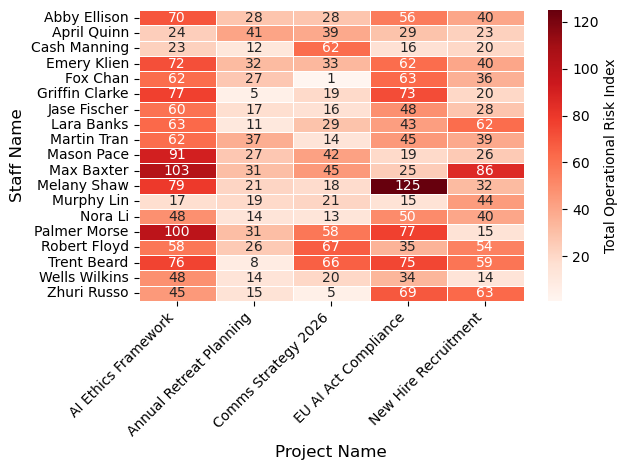

In [20]:
# making a heatmap of the workload by employee by project

# generating heatmap
ax = sns.heatmap(
    risk_pivot_df,
    annot=True,
    fmt='.0f',
    cmap='Reds',
    linewidth=.5,
    cbar_kws={'label': 'Total Operational Risk Index'}
)

# setting title and labels
ax.set_xlabel('Project Name', fontsize=12)
ax.set_ylabel('Staff Name', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [21]:
ORI_by_Dept = (tasks_projects_df.groupby('Department', as_index=False)
    .agg(
        ORI_by_Dept = ('Operational_Risk_Index', 'sum'),
        ORI_Count = ('Operational_Risk_Index', 'count')
    )
).sort_values('ORI_by_Dept', ascending=False).reset_index(drop=True)

ORI_by_Dept['ORI_by_Dept'] = ORI_by_Dept['ORI_by_Dept'].map('{:,.0f}'.format)

ORI_by_Dept

,Department,ORI_by_Dept,ORI_Count
0,Policy,"1,975",339
1,Ops,"1,275",216
2,Comms,640,106


In [22]:
ORI_by_Project_Dept = (tasks_projects_df.groupby(['Project_Name', 'Department'], as_index=False)
    .agg(
        ORI_by_Project = ('Operational_Risk_Index', 'sum'),
        ORI_Count = ('Operational_Risk_Index', 'count')
    )
).sort_values('ORI_by_Project', ascending=False).reset_index(drop=True)

ORI_by_Project_Dept

,Project_Name,Department,ORI_by_Project,ORI_Count
0,AI Ethics Framework,Policy,579,102
1,EU AI Act Compliance,Policy,473,78
2,AI Ethics Framework,Ops,395,66
3,New Hire Recruitment,Policy,373,60
4,EU AI Act Compliance,Ops,359,62
5,Comms Strategy 2026,Policy,344,62
6,New Hire Recruitment,Ops,239,37
7,Annual Retreat Planning,Policy,206,37
8,AI Ethics Framework,Comms,204,35
9,Comms Strategy 2026,Ops,149,25


In [23]:
tasks_projects_df

,Task_ID,Project_Name,Staff_ID,Staff_Workload_FTE_Days,Task_Duration_Hours,Timezone_Constraint_Score,Project_Risk_Score,External_Dependency_Flag,Planned_Start_Date,Actual_Duration_Hours,Task_Status,Predecessor_Task_ID,Name,Department,Timezone,Operational_Risk_Index
0,T0001,AI Ethics Framework,STAFF_05,2.22,66,1,2,0,2025-11-18,28.0,In Progress,T0873,Abby Ellison,Policy,ET,2
1,T0002,AI Ethics Framework,STAFF_16,3.89,79,3,1,0,2025-11-28,60.0,In Progress,None,Griffin Clarke,Comms,ET,3
2,T0003,AI Ethics Framework,STAFF_05,4.28,58,1,3,0,2026-03-19,61.0,In Progress,T0096,Abby Ellison,Policy,ET,3
3,T0004,AI Ethics Framework,STAFF_03,2.75,27,1,4,0,2025-10-15,64.0,In Progress,T0957,Zhuri Russo,Ops,CET,4
4,T0005,Annual Retreat Planning,STAFF_12,3.82,66,3,1,0,2026-03-24,27.0,In Progress,T0913,Wells Wilkins,Policy,CET,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,T1294,Comms Strategy 2026,STAFF_12,0.41,10,1,2,0,2025-11-03,47.0,In Progress,T0070,Wells Wilkins,Policy,CET,2
1294,T1295,EU AI Act Compliance,STAFF_07,0.97,69,1,4,0,2025-10-17,65.0,In Progress,None,Murphy Lin,Policy,ET,4
1296,T1297,AI Ethics Framework,STAFF_06,2.28,52,1,3,0,2026-03-02,45.0,In Progress,T0101,Lara Banks,Policy,ET,3
1298,T1299,AI Ethics Framework,STAFF_16,3.44,27,1,4,0,2025-12-15,48.0,In Progress,None,Griffin Clarke,Comms,ET,4


In [24]:
project_costs.head()

,Cost_ID,Task_ID,Cost_Category,Cost_Amount_USD,Vendor_Tool
0,C001,T0133,Software Subscription,3718,T&E Vendor
1,C002,T0157,Software Subscription,125,Gemini API
2,C003,T0875,Web Content License,9850,Legal Firm
3,C004,T0382,External Consultant,3824,Gemini API
4,C005,T1046,Travel/Retreat Expense,3558,Coda.io


In [25]:
# looking at the cost by vendor

vendor_costs = project_costs.groupby('Vendor_Tool', as_index=False).agg(
    Cost_By_Vendor = ('Cost_Amount_USD', 'sum'),
    Avg_Cost_By_Vendor = ('Cost_Amount_USD', 'mean'),
    Total_Transactions_By_Vendor = ('Cost_Amount_USD', 'count')
 )

In [26]:
vendor_costs['Cost_By_Vendor'] = vendor_costs['Cost_By_Vendor'].map('${:,.0f}'.format)
vendor_costs['Avg_Cost_By_Vendor'] = vendor_costs['Avg_Cost_By_Vendor'].map('${:,.0f}'.format)

In [27]:
vendor_costs

,Vendor_Tool,Cost_By_Vendor,Avg_Cost_By_Vendor,Total_Transactions_By_Vendor
0,Coda.io,"$613,079","$7,129",86
1,Gemini API,"$514,267","$7,143",72
2,Legal Firm,"$528,322","$8,386",63
3,Slack,"$574,770","$7,767",74
4,T&E Vendor,"$477,632","$7,463",64
5,WordPress,"$561,344","$7,586",74
6,Zoom,"$500,425","$7,469",67


In [28]:
# looking at cost by category

category_costs = (project_costs.groupby('Cost_Category', as_index=False)
    .agg(
        Cost_By_Category = ('Cost_Amount_USD', 'sum'),
        Avg_Cost_By_Category = ('Cost_Amount_USD', 'mean'),
        Total_Transactions_By_Category = ('Cost_Amount_USD', 'count')
    )
).sort_values('Cost_By_Category', ascending=False)

category_costs['Cost_By_Category'] = category_costs['Cost_By_Category'].map('${:,.0f}'.format)
category_costs['Avg_Cost_By_Category'] = category_costs['Avg_Cost_By_Category'].map('${:,.0f}'.format)

category_costs

,Cost_Category,Cost_By_Category,Avg_Cost_By_Category,Total_Transactions_By_Category
3,Web Content License,"$1,081,625","$7,781",139
1,Software Subscription,"$977,619","$7,698",127
0,External Consultant,"$931,721","$8,032",116
2,Travel/Retreat Expense,"$778,874","$6,601",118
